# Results

This notebook is used to generate the figures in Rüdisser et al. 2025.

### Importing packages

In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

project_root = Path().resolve().parent.parent
sys.path.append(str(project_root))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yaml
import pickle
from loguru import logger

# hide all logs except for errors
logger.remove()
logger.add(sys.stderr, level="ERROR")

from tqdm import tqdm

import matplotlib.font_manager as fm
import seaborn as sns

# Set up matplotlib style
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks")

from scripts.data.visualise.insitu_geosphere import prop

geo_cornflowerblue = "dodgerblue"
geo_lime = "gold"
geo_magenta = "firebrick"

from src.arcane2.data.data_utils.event import (
    EventCatalog
)

from src.arcane2.data.utils import compare_catalogs_for_results, merge_columns_by_mean, shift_columns

from src.arcane2.data.realtime.realtime_insitu_dataset import RealtimeInsituDataset
from src.arcane2.data.catalogs.icmecat_dataset import ICMECAT_Dataset
from src.arcane2.data.abstract.multi_signal_dataset import MultiSignalDataset

### Loading config

In [3]:
# we load the config file used during training

config = yaml.safe_load(
    open(project_root / "config/base_dataset/min10_1024.yaml")
)

### Loading results

In [4]:
# we prepare the filepaths for the results that were generated during inference

result_paths = []

run_names = ["arcane_min10_1024"]
for run_name in run_names:
    cache_path = project_root / f"cache/{run_name}"

    path = (
        cache_path
        / f"all_results_min10_1024_tminus_all.pkl"
    )
    if path.exists():
        result_paths.append(path)

In [5]:
# we load the results and concatenate them into a single dataframe

for i, path in enumerate(tqdm(result_paths)):
    if i == 0:
        all_results = pd.read_pickle(path)
    else:
        loaded = pd.read_pickle(path)
        all_results = pd.concat([all_results, loaded], axis=0).sort_index()
        all_results = all_results.combine_first(loaded)
        all_results = all_results.groupby(all_results.index).first()


100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


In [6]:
all_results

,idx,true_value,predicted_value_arcane_min10_1024_0_tminus1,predicted_value_arcane_min10_1024_0_tminus2,predicted_value_arcane_min10_1024_0_tminus3,predicted_value_arcane_min10_1024_0_tminus4,predicted_value_arcane_min10_1024_0_tminus5,predicted_value_arcane_min10_1024_0_tminus6,predicted_value_arcane_min10_1024_0_tminus7,predicted_value_arcane_min10_1024_0_tminus8,...,predicted_value_arcane_min10_1024_2_tminus141,predicted_value_arcane_min10_1024_2_tminus142,predicted_value_arcane_min10_1024_2_tminus143,predicted_value_arcane_min10_1024_2_tminus144,predicted_value_arcane_min10_1024_2_tminus145,predicted_value_arcane_min10_1024_2_tminus146,predicted_value_arcane_min10_1024_2_tminus147,predicted_value_arcane_min10_1024_2_tminus148,predicted_value_arcane_min10_1024_2_tminus149,predicted_value_arcane_min10_1024_2_tminus150
1998-02-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-16 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-16 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-16 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-16 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-17 13:40:00,48541.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.925980e-07,3.186545e-07,3.193530e-07,2.863607e-07,2.473370e-07,2.284103e-07,2.363599e-07,2.553848e-07,2.630537e-07,2.721275e-07
2024-12-17 13:50:00,48542.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.933563e-07,3.102321e-07,3.374047e-07,3.365579e-07,3.012584e-07,2.601115e-07,2.397773e-07,2.475947e-07,2.672504e-07,2.749217e-07
2024-12-17 14:00:00,48543.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.652929e-07,3.106013e-07,3.270448e-07,3.557324e-07,3.565543e-07,3.222693e-07,2.797854e-07,2.589186e-07,2.670935e-07,2.885084e-07
2024-12-17 14:10:00,48544.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.283399e-07,3.747792e-07,3.179394e-07,3.330381e-07,3.619192e-07,3.630188e-07,3.287879e-07,2.862733e-07,2.658637e-07,2.749231e-07


In [7]:
# we drop the missing values

all_results = all_results.dropna()

In [8]:
# check the percentage of missing values in all_results
expected_range = pd.date_range(
    start=all_results.index.min(),
    end=all_results.index.max(),
    freq="10min",
)
missing = expected_range.difference(all_results.index)
missing_percentage = len(missing) / len(expected_range) * 100
print(
    f"Missing values in all_results: {len(missing)} ({missing_percentage:.2f}%)"
)

Missing values in all_results: 115698 (8.22%)


In [9]:
# If the model trained correctly, the minimum value should be close to 0
print(f"Minimum value: {all_results["predicted_value_arcane_min10_1024_0_tminus1"].min()}")
print(f"Maximum value: {all_results['predicted_value_arcane_min10_1024_0_tminus1'].max()}")

Minimum value: 0.0
Maximum value: 1.0


/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/1490485282.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_presence = presence.resample("M").mean()  # fraction of data present each month


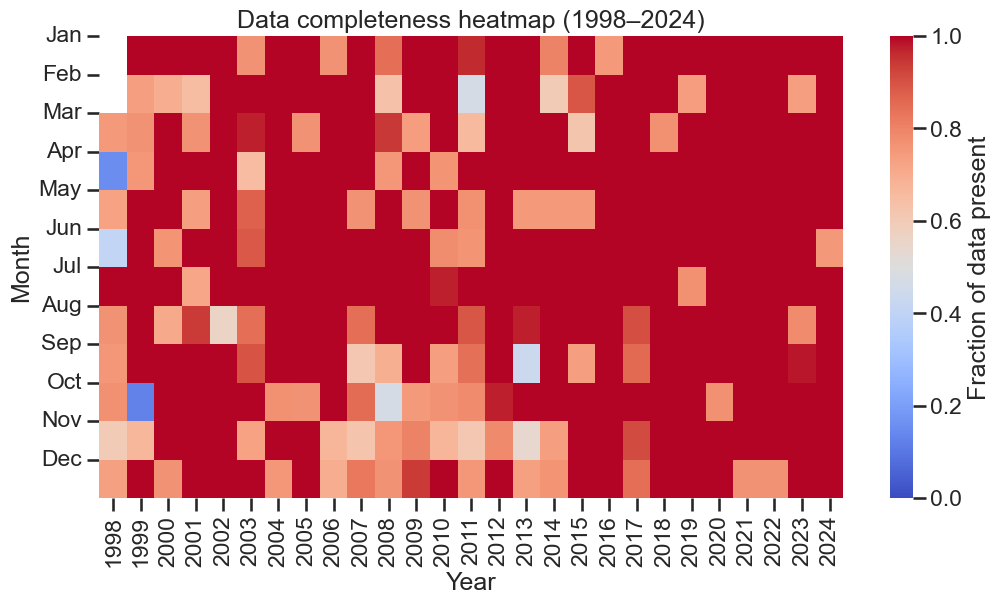

In [10]:

# Presence series: 1 if present, 0 if missing
presence = pd.Series(1, index=all_results.index).reindex(expected_range, fill_value=0)

# Aggregate by month
monthly_presence = presence.resample("M").mean()  # fraction of data present each month
monthly_presence = monthly_presence.to_frame("fraction_present")

# Extract year and month for pivot table
monthly_presence["year"] = monthly_presence.index.year
monthly_presence["month"] = monthly_presence.index.month

# Pivot: rows = months, columns = years
pivot = monthly_presence.pivot_table(
    index="month", columns="year", values="fraction_present"
)

# Restrict to 1998–2004
pivot = pivot.loc[:, 1998:2024]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    cmap="coolwarm", vmin=0, vmax=1,
    cbar_kws={'label': 'Fraction of data present'}
)
plt.ylabel("Month")
plt.xlabel("Year")
plt.title("Data completeness heatmap (1998–2024)")
plt.yticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], rotation=0)
plt.show()

### Creating Catalog Dataset

In [11]:
# We create the catalog dataset from the ICME Catalog

catalog_paths = [
    "https://helioforecast.space/static/sync/icmecat/HELIO4CAST_ICMECAT_v23.csv"
]
event_types = "ICME"
startname = "icme_start_time"
endname = "mo_end_time"

catalog_dataset = ICMECAT_Dataset(
    folder_paths=[project_root / "data/HELIO4CAST_ICMECAT_v23.csv"],
    event_types=event_types,
    startname=startname,
    endname=endname,
)

100%|██████████| 533/533 [00:03<00:00, 174.73it/s]


### Creating In Situ Dataset

In [12]:
# We create the insitu dataset from the NOAA archive, interpolating the data

folder_path = project_root / "data/noaa_archive_gsm.p"
components = config["dataset"]["single_signal_datasets"][1].get("components")
resample = config["dataset"]["single_signal_datasets"][1].get("resample")
resample_method = config["dataset"]["single_signal_datasets"][1].get("resample_method")
resample_freq = config["dataset"]["single_signal_datasets"][1].get("resample_freq")
padding = config["dataset"]["single_signal_datasets"][1].get("padding")
lin_interpol = config['dataset']['single_signal_datasets'][1].get('lin_interpol')
scaling = config["dataset"]["single_signal_datasets"][1].get("scaling", "None")

insitu_dataset = RealtimeInsituDataset(
    folder_path=folder_path,
    components=components,
    resample=resample,
    resample_freq=resample_freq,
    resample_method=resample_method,
    padding=padding,
    lin_interpol=lin_interpol,
    scaling=scaling,
)

### Creating MultiSignalDataset

In [13]:
# The two datasets are combined into a MultiSignalDataset

catalog_idx = 0

multi_signal_dataset = MultiSignalDataset(
    single_signal_datasets=[catalog_dataset, insitu_dataset],
    catalog_idx=catalog_idx,
)

Merging timestamps: 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]
Dataset: 0: 1570436it [00:00, 2911875.24it/s]
Dataset: 1: 1429765it [00:00, 3518746.26it/s]
Filling:: 2it [00:00,  2.07it/s]
100%|██████████| 533/533 [00:02<00:00, 199.22it/s]


### preprocess results

In [14]:
# We merge the columns and shift them by the time shift
df_merged = merge_columns_by_mean(all_results, prefix="predicted_value_arcane_min10_1024_", tminus_range=range(1,151))

In [15]:
df_shifted_and_merged = shift_columns(df_merged, freq="min", multiplier=10)

In [16]:
print("Columns with all nan values:")
print(df_shifted_and_merged.columns[df_shifted_and_merged.isna().all()])

Columns with all nan values:
Index([], dtype='object')


In [17]:
# To test the validity of our approach, we generate a catalog from the created ground truth time series

original_catalog = catalog_dataset.catalog.event_cat

In [18]:
# drop nan values
df_shifted_and_merged_processed_precat = df_shifted_and_merged.dropna()

In [19]:
# check the percentage of missing values in df_shifted_and_merged_processed_precat
expected_range = pd.date_range(
    start=df_shifted_and_merged_processed_precat.index.min(),
    end=df_shifted_and_merged_processed_precat.index.max(),
    freq="10min",
)
missing = expected_range.difference(df_shifted_and_merged_processed_precat.index)
missing_percentage = len(missing) / len(expected_range) * 100
print(
    f"Missing values in df_shifted_and_merged_processed_precat: {len(missing)} ({missing_percentage:.2f}%)"
)

Missing values in df_shifted_and_merged_processed_precat: 133662 (9.49%)


In [20]:
detectable_original_catalog = []

for event in original_catalog:
    if event.begin > df_shifted_and_merged_processed_precat.index[0] and event.begin < df_shifted_and_merged_processed_precat.index[-1]:
        #calculate the number of datapoints in the time range at a resolution of 30 min
        expected_nr_datapoints = int((event.end - event.begin).total_seconds() / 60 / 30)
        actual_nr_datapoints = df_shifted_and_merged_processed_precat.loc[event.begin : event.end].shape[0]
        if actual_nr_datapoints > expected_nr_datapoints * 0.99:
            detectable_original_catalog.append(event)
        else:
            df_shifted_and_merged_processed_precat.loc[event.begin : event.end] = np.nan

In [21]:
# drop nan values
df_shifted_and_merged_processed = df_shifted_and_merged_processed_precat.dropna()

### Analysing Results

In [22]:
extracted_catalog = EventCatalog(
    event_types="CME",
    catalog_name="True Catalog",
    spacecraft="Wind",
    dataframe=df_shifted_and_merged_processed,
    key="ICMECAT_catalog-ICME",
    resample_freq="10min",
    creep_delta=10,
).event_cat

In [23]:
len(extracted_catalog)

422

In [24]:
# We create a dataframe with the number of events per month

dateindex = pd.date_range(start="1998", end="2025", freq="1Y")

event_numbers = pd.DataFrame(
    index=dateindex,
    columns=["Detectable", "Extracted"], 
)

for date in dateindex:
    event_numbers.loc[date, "Detectable"] = len(
        [
            x
            for x in detectable_original_catalog
            if x.begin.year == date.year 
        ]
    )
    event_numbers.loc[date, "Extracted"] = len(
        [
            x
            for x in extracted_catalog
            if x.begin.year == date.year 
        ]
    )

/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/2823297274.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dateindex = pd.date_range(start="1998", end="2025", freq="1Y")


Event numbers:


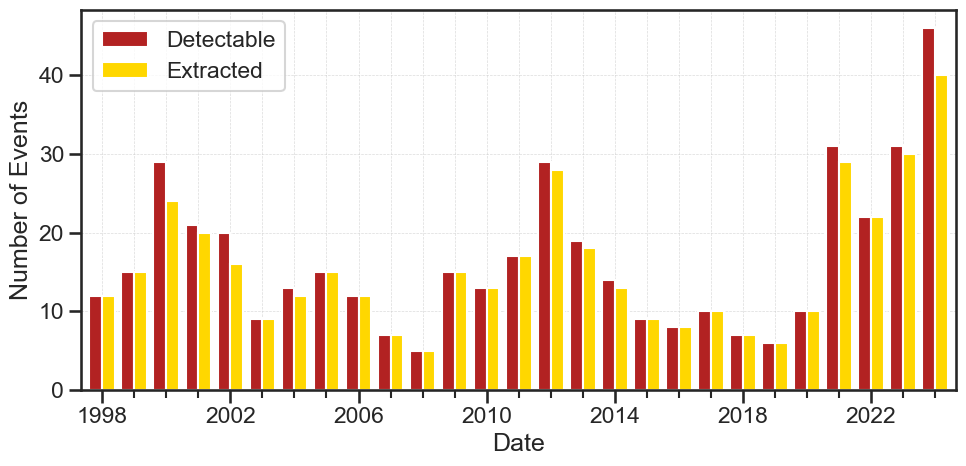

In [25]:
# We plot the number of events per month

fig, axs = plt.subplots(1, 1, figsize=(10, 5))

event_numbers.plot(
    ax=axs, kind ="bar", color=[geo_magenta, geo_lime, geo_cornflowerblue], width=0.8
)

axs.set_ylabel("Number of Events")
axs.set_xlabel("Date")
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Format x-axis to show only the year
axs.set_xticks(range(0, len(event_numbers.index), 4))
axs.set_xticklabels(event_numbers.index[::4].year, ha="center", rotation=0)

# add minor ticks
axs.xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.tight_layout()

plt.savefig("../../plots/event_numbers_revised.pdf")

print("Event numbers:")
plt.show()

In [26]:
TP, FP, FN, _, found_already, detected, _, ious = compare_catalogs_for_results(
    extracted_catalog, detectable_original_catalog
)

In [27]:
for event in FN:
    event.plot_mag(df_shifted_and_merged_processed, delta = 32, pred_key="true_value")

In [28]:
# We expect less events in the extracted catalog than in the original catalog. The results should be perfect scores.

print("####################################")
print(" RESULTS FOR GENERATED CATALOG")
print("####################################")
print("")
print(f"original: {len(detectable_original_catalog)}")
print(f"predicted: {len(extracted_catalog)}")
print("")
print("")
print(f"TP: {len(TP)}")
print(f"FP: {len(FP)}")
print(f"FN: {len(FN)}")

predicted = len(extracted_catalog)
precision = len(TP) / (len(TP) + len(FP)) #(predicted - len(FP)) / (predicted)
recall = len(TP) / (len(TP) + len(FN))
print(f"ratio: {predicted/len(TP)}")
print("")
print(f"Precision: {(predicted-len(FP))/(predicted)}")
print(f"Recall: {len(TP)/len(TP + FN)}")
print(f"F1: {2*(precision*recall)/(precision+recall)}")
print("")
print(f"mean iou: {np.mean(ious)}")

####################################
 RESULTS FOR GENERATED CATALOG
####################################

original: 445
predicted: 422


TP: 445
FP: 0
FN: 0
ratio: 0.9483146067415731

Precision: 1.0
Recall: 1.0
F1: 1.0

mean iou: 0.9319997826507116


## Threshold comparison

In [29]:
# We create the threshold classifier baseline

df = multi_signal_dataset.df.copy()

from scipy.constants import k, proton_mass, pi
import numpy as np

v_threshold = 30 * 1e3

T_threshold = v_threshold**2 * proton_mass * pi / (8 * k)

T_threshold = np.round(T_threshold, -3)

b_threshold = 8
beta_threshold = 0.3
v_threshold = 30

print(
    f"Thresholds: T = {T_threshold} K, B = {b_threshold} nT, beta = {beta_threshold}, V = {v_threshold} km/s"
)

cols = ["true_value", "predicted_value_threshold"]

result_df = pd.DataFrame(columns=cols, index=df.index)

result_df["predicted_value_threshold"] = 0
result_df["true_value"] = df["ICMECAT_catalog-ICME"]

# Set true_value to 1 only when all three conditions are true
result_df.loc[
    (df["NOAA Realtime Archive_insitu-bt"] >= b_threshold)
    & (df["NOAA Realtime Archive_insitu-beta"] <= beta_threshold)
    & (df["NOAA Realtime Archive_insitu-tp"] <= T_threshold),
    "predicted_value_threshold",
] = 1


Thresholds: T = 43000.0 K, B = 8 nT, beta = 0.3, V = 30 km/s


In [30]:
# We start with the eventwise comparison of the threshold classifier

print("####################################")
print(" RESULTS FOR EVENTWISE THRESHOLD CLASSIFIER")
print("####################################")
print("")


threshold_catalog = EventCatalog(
    event_types="CME",
    catalog_name="Threshold Catalog",
    spacecraft="OMNI",
    dataframe=result_df,
    key="predicted_value_threshold",
    creep_delta=10,
    resample_freq=resample_freq
).event_cat

threshold_catalog = [ event for event in threshold_catalog if (event.end - event.begin) > datetime.timedelta(minutes=10)]

(
    TP_threshold,
    FP_threshold,
    FN_threshold,
    threshold_delays,
    found_already_threshold,
    detected_threshold,
    threshold_durations,
    ious_threshold,
) = compare_catalogs_for_results(threshold_catalog, extracted_catalog)

print(f"TP: {len(TP_threshold)}")
print(f"FP: {len(FP_threshold)}")
print(f"FN: {len(FN_threshold)}")


predicted_threshold = len(threshold_catalog)
precision_threshold = len(TP_threshold) / (len(TP_threshold) + len(FP_threshold)) 
recall_threshold = len(TP_threshold) / (len(TP_threshold) + len(FN_threshold))
f1_threshold = (
    2
    * (precision_threshold * recall_threshold)
    / (precision_threshold + recall_threshold)
)

print(f"Precision: {precision_threshold}")
print(f"Recall: {recall_threshold}")
print(f"F1: {f1_threshold}")
print(f"mean iou: {np.mean(ious_threshold)}")

####################################
 RESULTS FOR EVENTWISE THRESHOLD CLASSIFIER
####################################

TP: 298
FP: 2588
FN: 124
Precision: 0.10325710325710326
Recall: 0.7061611374407583
F1: 0.18016928657799275
mean iou: 0.1187887768607877


In [31]:
#Uncomment to redo the analysis

redo_analysis = False

if redo_analysis:

    resultsdict = {}

    things_to_plot = {}

    for t in tqdm(range(1,151, 1)):
        key = f"predicted_value_arcane_min10_1024_tminus{t}"
        
        things_to_plot[key] = {}
        
        thresholds = np.arange(0.1, 1, 0.1)
        precisions = []
        recalls = []
        f1s = []
        ious_all = []
        delays_all = []
        durations_all = []
        FPs = []
        TPs = []
        FNs = []
        predicteds = []


        for thresh in tqdm(thresholds):
            cat_temp = EventCatalog(
                event_types="CME",
                spacecraft="Wind",
                dataframe=df_shifted_and_merged_processed,
                key=key,
                creep_delta=10,
                thresh=thresh,
                resample_freq=resample_freq
            )

            icmes_in_proba = cat_temp.event_cat
            
            TP, FP, FN, delays, found_already, detected, durations, ious = (
            compare_catalogs_for_results(icmes_in_proba, extracted_catalog) #detectable_original_catalog)
                )
            
            predicted = len(icmes_in_proba)

            if len(TP) == 0:
                ratio = 0
            else:
                ratio = predicted / len(TP)

            if len(TP) + len(FP) == 0: #predicted == 0:
                precision = 0
            else:
                precision = len(TP) / (len(TP) + len(FP)) #(predicted - len(FP)) / predicted

            if len(TP) + len(FN) == 0:
                recall = 1
            else:
                recall = len(TP) / (len(TP) + len(FN))

            if precision + recall == 0:
                f1 = 0
            else:
                f1 = 2 * (precision * recall) / (precision + recall)

            if precision > 0 and recall > 0:

                precisions.append(precision)
                recalls.append(recall)
                f1s.append(f1)
                ious_all.append(ious)
                delays_all.append(delays)
                durations_all.append(durations)
                FPs.append(FP)
                TPs.append(TP)
                FNs.append(FN)
                predicteds.append(icmes_in_proba)
        
        things_to_plot[key]['precisions'] = precisions
        things_to_plot[key]['recalls'] = recalls


        max_f1 = np.argmax(f1s)
        max_f1_thresh = thresholds[max_f1]
        max_f1_recall = recalls[max_f1]
        max_f1_precision = precisions[max_f1]
        max_f1_f1 = f1s[max_f1]
        max_f1_iou = ious_all[max_f1]
        max_f1_delay = delays_all[max_f1]
        max_f1_duration = durations_all[max_f1]
        max_f1_FP = FPs[max_f1]
        max_f1_TP = TPs[max_f1]
        max_f1_FN = FNs[max_f1]
        max_f1_predicted = predicteds[max_f1]

        resultsdict[key] = {
            "threshold": max_f1_thresh,
            "recall": max_f1_recall,
            "precision": max_f1_precision,
            "f1": max_f1_f1,
            "iou": max_f1_iou,
            "delay": max_f1_delay,
            "duration": max_f1_duration,
            "FP": max_f1_FP,
            "TP": max_f1_TP,
            "FN": max_f1_FN,
            "predicted": max_f1_predicted,
        }

    # save result_dict to file

    with open("resultsdict_strict_extracted.pkl", "wb") as f:
        pickle.dump(resultsdict, f)

    # save things_to_plot to file

    with open("things_to_plot_extracted.pkl", "wb") as f:
        pickle.dump(things_to_plot, f)

In [32]:
with open("things_to_plot_extracted.pkl", "rb") as f:
    things_to_plot = pickle.load(f)

with open("resultsdict_strict_extracted.pkl", "rb") as f:
    resultsdict = pickle.load(f)

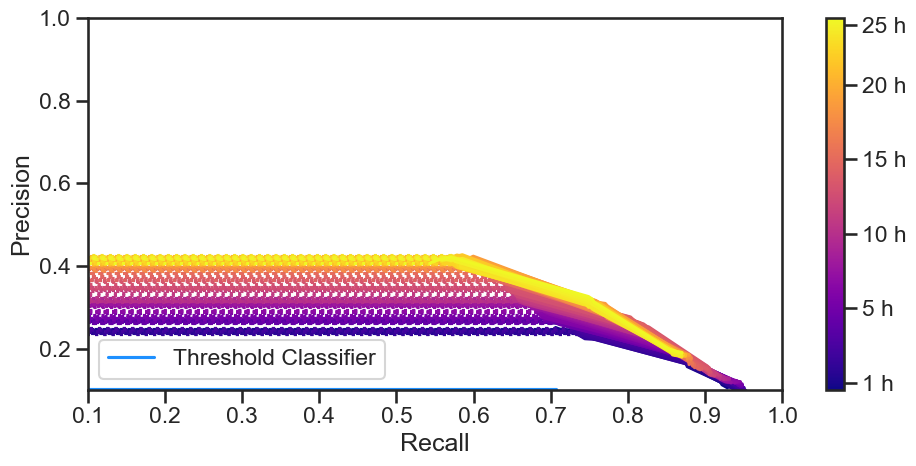

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

colors = plt.cm.plasma(np.linspace(0, 1, 151))
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=-51, vmax=-1))


for i, key in enumerate(things_to_plot.keys()):

    recalls = things_to_plot[key]["recalls"] 
    precisions = things_to_plot[key]["precisions"] 

    axs.plot(recalls, precisions, color=colors[i], label="")
    axs.set_xlim(0.1, 1)
    axs.set_ylim(0.1, 1)
    axs.set_xlabel("Recall")
    axs.set_ylabel("Precision")

    # plot dashed horiuontal lines
    recalls_contin = [recalls[-1]] + [0]
    precis_contin = [precisions[-1]]+[precisions[-1]]

    axs.plot(recalls_contin, precis_contin, color=colors[i], linestyle = "dotted") #, linewidth = 0.2)

cb1 = fig.colorbar(sm, ax=axs, orientation="vertical")

ticks = [-2, -10, -20, - 30, -40, -50]
tick_labels = [f"{-int(t/2)} h" for t in ticks[::-1]] 

cb1.set_ticks(ticks)
cb1.set_ticklabels(tick_labels)

axs.plot([0, recall_threshold, recall_threshold], [precision_threshold, precision_threshold, 0], color=geo_cornflowerblue, label="Threshold Classifier")

# show legend
axs.legend(loc="lower left")

fig.tight_layout()
plt.savefig("../../plots/precision_recall_curves_revised.pdf")
plt.show()

In [34]:
t = np.arange(1,151, 1)

resultsdictkeys = list(resultsdict.keys())

precisions = [resultsdict[resultsdictkeys[i-1]]["precision"] for i in t]
recalls = [resultsdict[resultsdictkeys[i-1]]["recall"] for i in t]
f1s = [resultsdict[resultsdictkeys[i-1]]["f1"] for i in t]
thresholds = [resultsdict[resultsdictkeys[i-1]]["threshold"] for i in t]
ious = [resultsdict[resultsdictkeys[i-1]]["iou"] for i in t]
durations_all = [resultsdict[resultsdictkeys[i-1]]["duration"] for i in t]
delays_all = [resultsdict[resultsdictkeys[i-1]]["delay"] for i in t]
FPs = [resultsdict[resultsdictkeys[i-1]]["FP"] for i in t]
TPs = [resultsdict[resultsdictkeys[i-1]]["TP"] for i in t]
FNs = [resultsdict[resultsdictkeys[i-1]]["FN"] for i in t]
predicteds = [resultsdict[resultsdictkeys[i-1]]["predicted"] for i in t]

mean_rel_delays = []
mean_delays = []
mean_rel_start_time_errors = []
mean_start_time_errors = []

for wt in t:
    corrected_delays = [or_delay + wt * 60 /6 if or_delay > 0 else wt * 60 /6 for or_delay in resultsdict[resultsdictkeys[wt-1]]["delay"]]
    start_time_error = [or_delay if or_delay > 0 else -or_delay for or_delay in resultsdict[resultsdictkeys[wt-1]]["delay"]]

    durations = resultsdict[resultsdictkeys[wt-1]]["duration"]
    rel_delays = np.array(corrected_delays) / np.array(durations)
    rel_start_time_error = np.array(start_time_error) / np.array(durations)
    
    mean_rel_delays.append(np.mean(rel_delays) * 100)
    mean_rel_start_time_errors.append(np.mean(rel_start_time_error) * 100)
    mean_delays.append(np.mean(corrected_delays)/60)
    mean_start_time_errors.append(np.mean(start_time_error)/60)

corrected_threshold_delays = [or_delay + 0 * 60 if or_delay > 0 else 0 * 60 for or_delay in threshold_delays]
start_time_error_threshold = [or_delay if or_delay > 0 else -or_delay for or_delay in threshold_delays]
rel_delays_threshold = np.array(corrected_threshold_delays) / np.array(threshold_durations) * 100
rel_start_time_error_threshold = np.array(start_time_error_threshold) / np.array(threshold_durations) * 100
mean_rel_delays_threshold = np.mean(rel_delays_threshold)
mean_rel_start_time_errors_threshold = np.mean(rel_start_time_error_threshold)
mean_delays_threshold = np.mean(corrected_threshold_delays)/60
mean_start_time_error_threshold = np.mean(start_time_error_threshold)/60

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/2268452209.py:5: SyntaxWarning: invalid escape sequence '\d'
  axs.set_xlabel("$\delta$ [hours]")


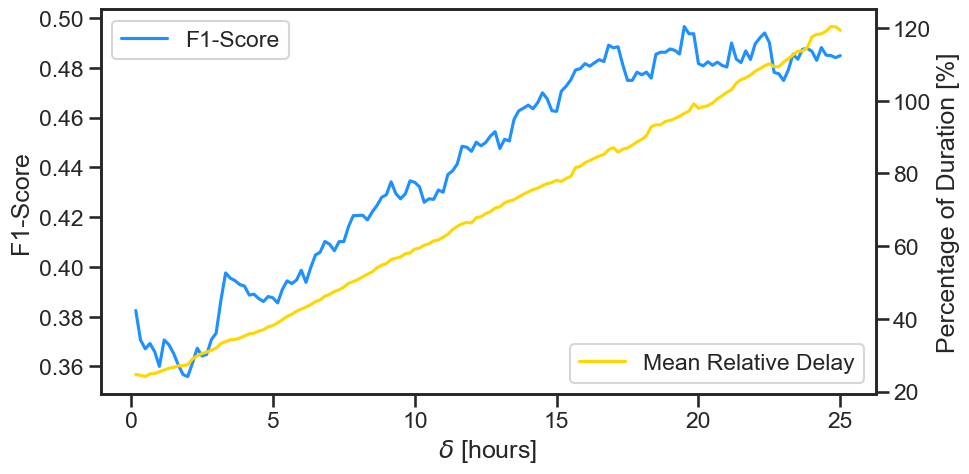

In [35]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

axs.plot(t/6, f1s, label="F1-Score", color=geo_cornflowerblue)

axs.set_xlabel("$\delta$ [hours]")
axs.set_ylabel("F1-Score")

# plot mean_rel_delays on a secondary y-axis
axs2 = axs.twinx()
axs2.plot(t/6, mean_rel_delays, label="Mean Relative Delay", color=geo_lime)

axs2.set_ylabel("Percentage of Duration [%]")

axs.legend(loc="upper left")
axs2.legend(loc="lower right")
fig.savefig("../../plots/pr_rec_waiting_eventwise_revised.pdf", bbox_inches="tight")

<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:47: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:47: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/1555851435.py:32: SyntaxWarning: invalid escape sequence '\d'
  cb1.set_label("$\delta$ [hours]")
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/1555851435.py:47: SyntaxWarning: invalid escape sequence '\d'
  combined_axs[1].set_xlabel("$\delta$ [hours]")


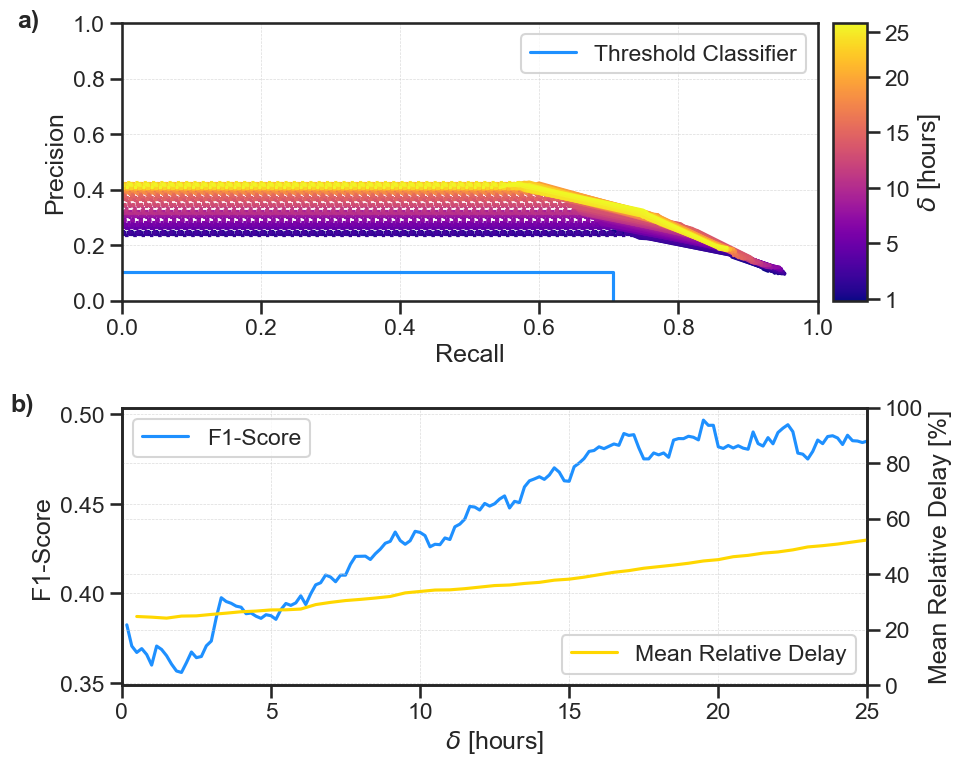

In [36]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

combined_fig, combined_axs = plt.subplots(2, 1, figsize=(10, 8))

colors = plt.cm.plasma(np.linspace(0, 1, 151))
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=-151, vmax=-1))

for i, key in enumerate(things_to_plot.keys()):

    recalls_to_plot = things_to_plot[key]["recalls"] # + [0]
    precisions_to_plot = things_to_plot[key]["precisions"] #+ [things_to_plot[key]["precisions"][-1]] 

    combined_axs[0].plot(recalls_to_plot, precisions_to_plot, color=colors[i], label="")
    combined_axs[0].set_xlim(0, 1)
    combined_axs[0].set_ylim(0, 1)
    combined_axs[0].set_xlabel("Recall")
    combined_axs[0].set_ylabel("Precision")

    # plot dashed horiuontal lines
    recalls_contin = [recalls_to_plot[-1]] + [0]
    precis_contin = [precisions_to_plot[-1]]+[precisions_to_plot[-1]]

    combined_axs[0].plot(recalls_contin, precis_contin, color=colors[i], linestyle = "dotted") #, linewidth = 0.2)

# Create an axis divider for the upper subplot
divider = make_axes_locatable(combined_axs[0])
cax = divider.append_axes("right", size="5%", pad=0.15)

cb1 = combined_fig.colorbar(sm, cax=cax, orientation="vertical")

# add label to colorbar below
cb1.set_label("$\delta$ [hours]")

ticks = [-2*3, -10*3, -20*3, - 30*3, -40*3, -50*3] 
tick_labels = [f"{-int(t/6)}" for t in ticks[::-1]] 

cb1.set_ticks(ticks)
cb1.set_ticklabels(tick_labels)

combined_axs[0].plot([0, recall_threshold, recall_threshold], [precision_threshold, precision_threshold, 0], color=geo_cornflowerblue, label="Threshold Classifier")

# show legend
combined_axs[0].legend(loc="upper right")

combined_axs[1].plot(t/6, f1s, label="F1-Score", color=geo_cornflowerblue)

combined_axs[1].set_xlabel("$\delta$ [hours]")
combined_axs[1].set_ylabel("F1-Score")

combined_axs[1].set_xlim(0, 25)

# plot mean_rel_delays on a secondary y-axis
axs2 = combined_axs[1].twinx()
axs2.plot(t/2, mean_rel_delays, label="Mean Relative Delay", color=geo_lime)
axs2.set_ylabel("Mean Relative Delay [%]")

combined_axs[1].legend(loc="upper left")
axs2.legend(loc="lower right")

combined_axs[0].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
combined_axs[1].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
axs2.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Add subplot labels
combined_axs[0].text(-0.15, 1.05, "a)", transform=combined_axs[0].transAxes,
                     fontweight='bold', va='top', ha='left')

combined_axs[1].text(-0.15, 1.05, "b)", transform=combined_axs[1].transAxes,
                     fontweight='bold', va='top', ha='left')

axs2.set_ylim(0, 100)

combined_fig.tight_layout()

plt.savefig("../../plots/combined_results_revised.pdf")
plt.show()

<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:45: SyntaxWarning: invalid escape sequence '\d'
<>:72: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:45: SyntaxWarning: invalid escape sequence '\d'
<>:72: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/3758778690.py:30: SyntaxWarning: invalid escape sequence '\d'
  cb1.set_label("$\delta$ [hours]")
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/3758778690.py:45: SyntaxWarning: invalid escape sequence '\d'
  combined_axs_with_nr[2].set_xlabel("$\delta$ [hours]")
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/3758778690.py:72: SyntaxWarning: invalid escape sequence '\d'
  combined_axs_with_nr[1].set_xlabel("$\delta$ [hours]")


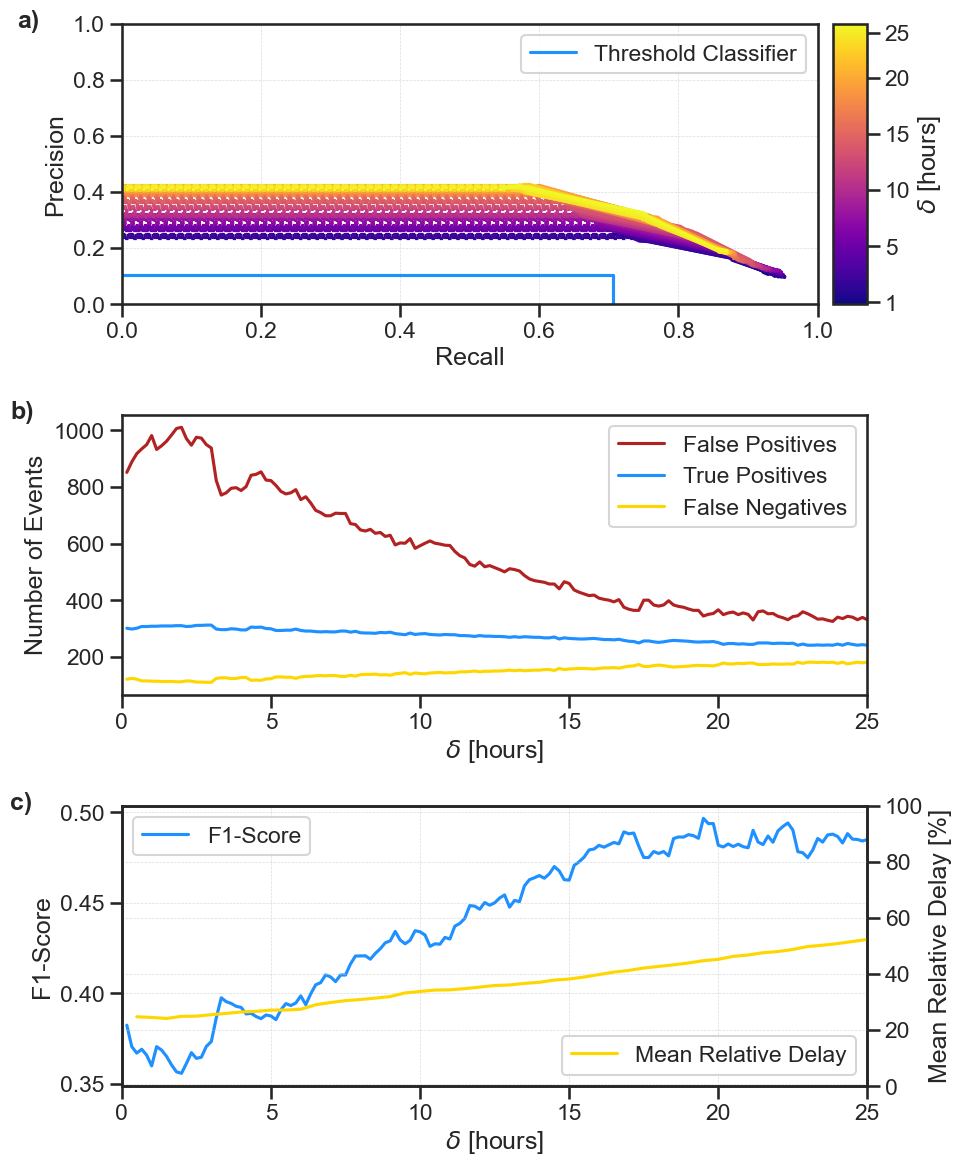

In [37]:
combined_fig_with_nr, combined_axs_with_nr = plt.subplots(3, 1, figsize=(10, 12))

colors = plt.cm.plasma(np.linspace(0, 1, 151))
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=-151, vmax=-1))

for i, key in enumerate(things_to_plot.keys()):

    recalls_to_plot = things_to_plot[key]["recalls"] # + [0]
    precisions_to_plot = things_to_plot[key]["precisions"] #+ [things_to_plot[key]["precisions"][-1]] 

    combined_axs_with_nr[0].plot(recalls_to_plot, precisions_to_plot, color=colors[i], label="")
    combined_axs_with_nr[0].set_xlim(0, 1)
    combined_axs_with_nr[0].set_ylim(0, 1)
    combined_axs_with_nr[0].set_xlabel("Recall")
    combined_axs_with_nr[0].set_ylabel("Precision")

    # plot dashed horiuontal lines
    recalls_contin = [recalls_to_plot[-1]] + [0]
    precis_contin = [precisions_to_plot[-1]]+[precisions_to_plot[-1]]

    combined_axs_with_nr[0].plot(recalls_contin, precis_contin, color=colors[i], linestyle = "dotted") #, linewidth = 0.2)

# Create an axis divider for the upper subplot
divider = make_axes_locatable(combined_axs_with_nr[0])
cax = divider.append_axes("right", size="5%", pad=0.15)

cb1 = combined_fig_with_nr.colorbar(sm, cax=cax, orientation="vertical")

# add label to colorbar below
cb1.set_label("$\delta$ [hours]")

ticks = [-2*3, -10*3, -20*3, - 30*3, -40*3, -50*3] 
tick_labels = [f"{-int(t/6)}" for t in ticks[::-1]] 

cb1.set_ticks(ticks)
cb1.set_ticklabels(tick_labels)

combined_axs_with_nr[0].plot([0, recall_threshold, recall_threshold], [precision_threshold, precision_threshold, 0], color=geo_cornflowerblue, label="Threshold Classifier")

# show legend
combined_axs_with_nr[0].legend(loc="upper right")

combined_axs_with_nr[2].plot(t/6, f1s, label="F1-Score", color=geo_cornflowerblue)

combined_axs_with_nr[2].set_xlabel("$\delta$ [hours]")
combined_axs_with_nr[2].set_ylabel("F1-Score")

combined_axs_with_nr[2].set_xlim(0, 25)

# plot mean_rel_delays on a secondary y-axis
axs2 = combined_axs_with_nr[2].twinx()
axs2.plot(t/2, mean_rel_delays, label="Mean Relative Delay", color=geo_lime)
axs2.set_ylabel("Mean Relative Delay [%]")

combined_axs_with_nr[2].legend(loc="upper left")
axs2.legend(loc="lower right")

combined_axs_with_nr[0].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
combined_axs_with_nr[2].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
axs2.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

axs2.set_ylim(0, 100)

FPs_to_plot = [len(FPs[i]) for i in range(len(FPs))]
TPs_to_plot = [len(TPs[i]) for i in range(len(TPs))]
FNs_to_plot = [len(FNs[i]) for i in range(len(FNs))]

combined_axs_with_nr[1].plot(t/6, FPs_to_plot, label="False Positives", color=geo_magenta)
combined_axs_with_nr[1].plot(t/6, TPs_to_plot, label="True Positives", color=geo_cornflowerblue)
combined_axs_with_nr[1].plot(t/6, FNs_to_plot, label="False Negatives", color=geo_lime)

combined_axs_with_nr[1].set_xlabel("$\delta$ [hours]")
combined_axs_with_nr[1].set_ylabel("Number of Events")

combined_axs_with_nr[1].set_xlim(0, 25)
combined_axs_with_nr[1].legend(loc="upper right")

# Add subplot labels
combined_axs_with_nr[0].text(-0.15, 1.05, "a)", transform=combined_axs_with_nr[0].transAxes,
                     fontweight='bold', va='top', ha='left')

combined_axs_with_nr[1].text(-0.15, 1.05, "b)", transform=combined_axs_with_nr[1].transAxes,
                     fontweight='bold', va='top', ha='left')

combined_axs_with_nr[2].text(-0.15, 1.05, "c)", transform=combined_axs_with_nr[2].transAxes,
                     fontweight='bold', va='top', ha='left')

combined_fig_with_nr.tight_layout()

plt.savefig("../../plots/combined_results_with_nr_revised.pdf")
plt.show()

In [38]:
print(f"Maximum F1: {max(f1s)} at {t[np.argmax(f1s)]/6} hours")
print(f"Precision at maximum F1: {precisions[np.argmax(f1s)]}")
print(f"Recall at maximum F1: {recalls[np.argmax(f1s)]}")
print(f"IOU at maximum F1: {np.mean(ious[np.argmax(f1s)])}")
print(f"Mean Delay at maximum F1: {mean_delays[np.argmax(f1s)]}")
print(f"Mean Relative Delay at maximum F1: {mean_rel_delays[np.argmax(f1s)]}")
print(f"Mean Start Time Error at maximum F1: {mean_start_time_errors[np.argmax(f1s)]}")
print(f"Mean Relative Start Time Error at maximum F1: {mean_rel_start_time_errors[np.argmax(f1s)]}")

Maximum F1: 0.49656526005888113 at 19.5 hours
Precision at maximum F1: 0.423785594639866
Recall at maximum F1: 0.5995260663507109
IOU at maximum F1: 0.47930482659272106
Mean Delay at maximum F1: 23.23451910408432
Mean Relative Delay at maximum F1: 96.46952763969077
Mean Start Time Error at maximum F1: 5.429512516469038
Mean Relative Start Time Error at maximum F1: 27.7789166464524


In [39]:
print(f"Minimum Delay: {min(mean_delays)} at {t[np.argmin(mean_delays)]/6} hours")
print(f"Precision at minimum Delay: {precisions[np.argmin(mean_delays)]}")
print(f"Recall at minimum Delay: {recalls[np.argmin(mean_delays)]}")
print(f"IOU at minimum Delay: {np.mean(ious[np.argmin(mean_delays)])}")
print(f"Mean Relative Delay at minimum Delay: {mean_rel_delays[np.argmin(mean_delays)]}")
print(f"F1 at minimum Delay: {f1s[np.argmin(mean_delays)]}")
print(f"Mean Start Time Error at minimum Delay: {mean_start_time_errors[np.argmin(mean_delays)]}")
print(f"Mean Relative Start Time Error at minimum Delay: {mean_rel_start_time_errors[np.argmin(mean_delays)]}")

Minimum Delay: 6.823366555924696 at 0.5 hours
Precision at minimum Delay: 0.2471264367816092
Recall at minimum Delay: 0.7132701421800948
IOU at minimum Delay: 0.3678859811137874
Mean Relative Delay at minimum Delay: 24.11704953812238
F1 at minimum Delay: 0.3670731707317073
Mean Start Time Error at minimum Delay: 7.455703211517164
Mean Relative Start Time Error at minimum Delay: 33.24961737295027


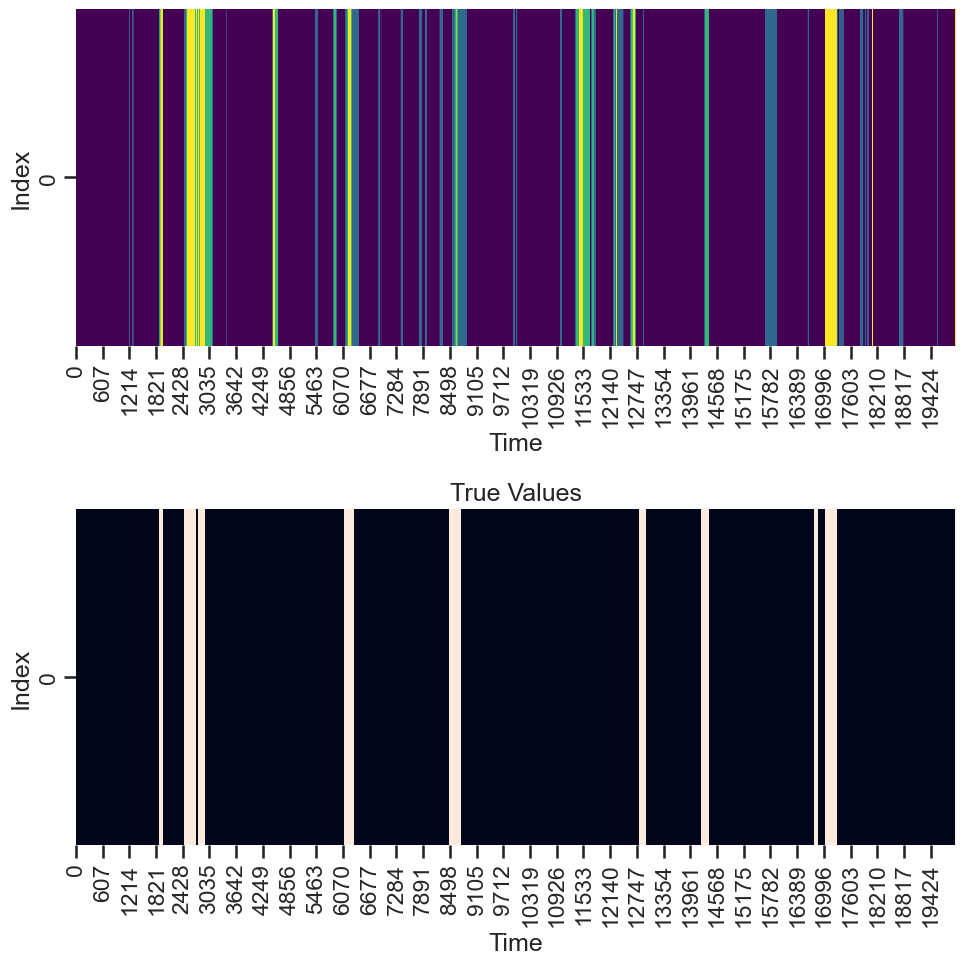

In [40]:
checkvalue = 50

check_fig, check_axs = plt.subplots(2, 1, figsize=(10, 10))
key = f"predicted_value_arcane_min10_1024_tminus{checkvalue}"
max_index = 20000

sns.heatmap(
    df_shifted_and_merged_processed[key].values[:max_index].reshape(-1, 1).T,
    cmap="viridis",
    ax=check_axs[0],
    cbar=False,
)

axs.set_title(f"Predicted Values for tminus{checkvalue}")
check_axs[0].set_xlabel("Time")
check_axs[0].set_ylabel("Index")

sns.heatmap(
    df_shifted_and_merged_processed["true_value"].values[:max_index].reshape(-1, 1).T,
    ax=check_axs[1],
    cbar=False,
)

check_axs[1].set_title("True Values")
check_axs[1].set_xlabel("Time")
check_axs[1].set_ylabel("Index")

plt.tight_layout()
plt.show()

In [41]:
# 0 - 10 min
# 1 - 20 min
# 2 - 30 min
# 3 - 40 min
# 4 - 50 min
# 5 - 1 hour
# 6 - 1 hour 10 min
# 7 - 1 hour 20 min
# 8 - 1 hour 30 min
# 9 - 1 hour 40 min
# 10 - 1 hour 50 min
# 11 - 2 hours
# 12 - 2 hours 10 min
# 13 - 2 hours 20 min
# 14 - 2 hours 30 min
# 15 - 2 hours 40 min
# 16 - 2 hours 50 min
# 17 - 3 hours
# 18 - 3 hours 10 min
# 19 - 3 hours 20 min
# 20 - 3 hours 30 min
# 21 - 3 hours 40 min
# 22 - 3 hours 50 min
# 23 - 4 hours
# 24 - 4 hours 10 min
# 25 - 4 hours 20 min
# 26 - 4 hours 30 min
# 27 - 4 hours 40 min
# 28 - 4 hours 50 min
# 29 - 5 hours
# 30 - 5 hours 10 min
# 31 - 5 hours 20 min
# 32 - 5 hours 30 min
# 33 - 5 hours 40 min
# 34 - 5 hours 50 min
# 35 - 6 hours
# 36 - 6 hours 10 min
# 37 - 6 hours 20 min
# 38 - 6 hours 30 min
# 39 - 6 hours 40 min
# 40 - 6 hours 50 min
# 41 - 7 hours
# 42 - 7 hours 10 min
# 43 - 7 hours 20 min
# 44 - 7 hours 30 min
# 45 - 7 hours 40 min
# 46 - 7 hours 50 min
# 47 - 8 hours
# 48 - 8 hours 10 min
# 49 - 8 hours 20 min
# 50 - 8 hours 30 min
# 51 - 8 hours 40 min
# 52 - 8 hours 50 min
# 53 - 9 hours
# 54 - 9 hours 10 min
# 55 - 9 hours 20 min
# 56 - 9 hours 30 min
# 57 - 9 hours 40 min
# 58 - 9 hours 50 min
# 59 - 10 hours
# 60 - 10 hours 10 min
# 61 - 10 hours 20 min
# 62 - 10 hours 30 min
# 63 - 10 hours 40 min
# 64 - 10 hours 50 min
# 65 - 11 hours
# 66 - 11 hours 10 min
# 67 - 11 hours 20 min
# 68 - 11 hours 30 min  
# 69 - 11 hours 40 min
# 70 - 11 hours 50 min
# 71 - 12 hours
# 72 - 12 hours 10 min
# 73 - 12 hours 20 min
# 74 - 12 hours 30 min
# 75 - 12 hours 40 min  
# 76 - 12 hours 50 min
# 77 - 13 hours
# 78 - 13 hours 10 min
# 79 - 13 hours 20 min
# 80 - 13 hours 30 min
# 81 - 13 hours 40 min
# 82 - 13 hours 50 min
# 83 - 14 hours
# 84 - 14 hours 10 min
# 85 - 14 hours 20 min
# 86 - 14 hours 30 min
# 87 - 14 hours 40 min
# 88 - 14 hours 50 min
# 89 - 15 hours
# 90 - 15 hours 10 min
# 91 - 15 hours 20 min
# 92 - 15 hours 30 min
# 93 - 15 hours 40 min
# 94 - 15 hours 50 min
# 95 - 16 hours

selected_ts = [
    2, #0, # 30 min
    17, #5, # 3 hours
    47, #8 hours   11, # 6 hours
    95, #16 hours    23, # 12 hours
]

selected_durations = [
    0.5,
    3,
    8, #6,
    16, #12,
]

hist_selected = {}
delays_mean_selected = {}
delays_rel_mean_selected = {}

# Define bins
bins = np.linspace(0, 100, 21)  # 20 bins from 0 to 100

wt_colors =["black", geo_magenta, geo_lime, geo_cornflowerblue]

for i, wt in enumerate(selected_ts):
    fp_wt = FPs[wt]
    tp_wt = TPs[wt]
    fn_wt = FNs[wt]
    predicted_wt = predicteds[wt]
    delays_wt =[or_delay + selected_durations[i] * 60 if or_delay > 0 else  selected_durations[i]  * 60 for or_delay in delays_all[wt]]
    start_time_error_wt = [or_delay if or_delay > 0 else -or_delay for or_delay in delays_all[wt]]
    durations_wt = durations_all[wt]
    rel_delays_wt = np.array(delays_wt) / np.array(durations_wt) * 100
    rel_start_time_error_wt = np.array(start_time_error_wt) / np.array(durations_wt) * 100

    precision_wt = precisions[wt]
    recall_wt = recalls[wt]
    f1_wt = f1s[wt]
    iou_wt = ious[wt]

    print(f"####################################")
    print(f" RESULTS FOR WAITING TIME {selected_durations[i]} HOURS")
    print(f"####################################")
    print("")
    print(f"TP: {len(tp_wt)}")
    print(f"FP: {len(fp_wt)}")
    print(f"FN: {len(fn_wt)}")
    print("")
    print(f"Precision: {precision_wt}")
    print(f"Recall: {recall_wt}")
    print(f"F1: {f1_wt}")
    print(f"IOU: {np.mean(iou_wt)}")
    print(f"Mean Delay: {np.mean(delays_wt)/60}")
    print(f"Mean Relative Delay: {np.mean(rel_delays_wt)}")
    print(f"Mean Start Time Error: {np.mean(start_time_error_wt)/60}")
    print(f"Mean Relative Start Time Error: {np.mean(rel_start_time_error_wt)}")

    hist, bin_edges = np.histogram(rel_delays_wt, bins=bins)

    hist_selected[str( selected_durations[i] )] = hist
    delays_mean_selected[str( selected_durations[i] )] = np.mean(delays_wt)
    delays_rel_mean_selected[str( selected_durations[i] )] = np.mean(rel_delays_wt)

print(f"####################################")
print(f" RESULTS FOR THRESHOLD CLASSIFIER")
print(f"####################################")
print("")
print(f"TP: {len(TP_threshold)}")
print(f"FP: {len(FP_threshold)}")
print(f"FN: {len(FN_threshold)}")
print("")
print(f"Precision: {precision_threshold}")
print(f"Recall: {recall_threshold}")
print(f"F1: {f1_threshold}")
print(f"IOU: {np.mean(ious_threshold)}")
print(f"Mean Delay: {np.mean(corrected_threshold_delays)/60}")
print(f"Mean Relative Delay: {np.mean(rel_delays_threshold)}")
print(f"Mean Start Time Error: {np.mean(start_time_error_threshold)/60}")
print(f"Mean Relative Start Time Error: {np.mean(rel_start_time_error_threshold)}")

hist_threshold, _ = np.histogram(rel_delays_threshold, bins=bins)

####################################
 RESULTS FOR WAITING TIME 0.5 HOURS
####################################

TP: 301
FP: 917
FN: 121

Precision: 0.2471264367816092
Recall: 0.7132701421800948
F1: 0.3670731707317073
IOU: 0.3678859811137874
Mean Delay: 6.823366555924696
Mean Relative Delay: 24.117049538122377
Mean Start Time Error: 7.455703211517164
Mean Relative Start Time Error: 33.24961737295026
####################################
 RESULTS FOR WAITING TIME 3 HOURS
####################################

TP: 312
FP: 937
FN: 110

Precision: 0.24979983987189752
Recall: 0.7393364928909952
F1: 0.3734290843806104
IOU: 0.40254075815968116
Mean Delay: 8.552884615384615
Mean Relative Delay: 31.922977708287174
Mean Start Time Error: 6.610042735042735
Mean Relative Start Time Error: 29.4463138705437
####################################
 RESULTS FOR WAITING TIME 8 HOURS
####################################

TP: 285
FP: 648
FN: 137

Precision: 0.3054662379421222
Recall: 0.6753554502369669
F1: 0.42

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/775476868.py:14: SyntaxWarning: invalid escape sequence '\d'
  axs.plot(x_positions, cdf, label=f"ARCANE Classifier, $\delta = {selected_durations[i]}$ h", color=wt_colors[i], marker="o", linestyle="-")
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/775476868.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


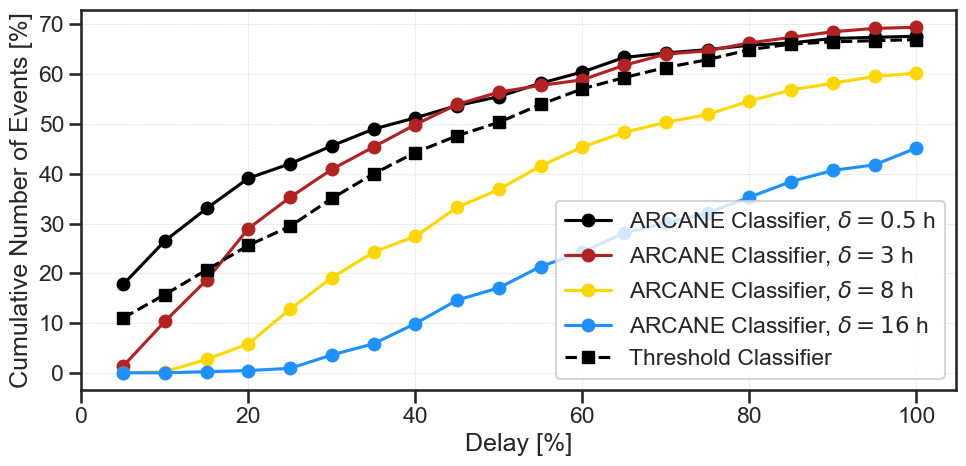

In [42]:
# X positions for the CDF
x_positions = bin_edges[1:]

# Create the figure
fig, axs = plt.subplots(figsize=(10, 5))

wt_colors =["black", geo_magenta, geo_lime, geo_cornflowerblue]

for i, wt in enumerate(selected_ts):


    cdf = np.cumsum(hist_selected[str(selected_durations[i])]) / len(detectable_original_catalog) * 100
    
    axs.plot(x_positions, cdf, label=f"ARCANE Classifier, $\delta = {selected_durations[i]}$ h", color=wt_colors[i], marker="o", linestyle="-")

cdf_threshold = np.cumsum(hist_threshold) / len(detectable_original_catalog) * 100

axs.plot(x_positions, cdf_threshold, label="Threshold Classifier", color="k", marker="s", linestyle="--")

axs.set_xticks(np.arange(0, 101, 20))

axs.set_xlabel("Delay [%]")
axs.set_ylabel("Cumulative Number of Events [%]")
axs.legend(loc="lower right")
axs.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

fig.tight_layout()
fig.savefig("../../plots/delay_cdf_revised.pdf", bbox_inches="tight")
fig.show()


In [43]:
#We calculate the mean absolute and relative delays
print("")
print("####################################")
print(" RESULTS FOR DELAYS")
print("####################################")

for i, wt in enumerate(selected_ts):
    print(f"Results for waiting time {selected_durations[i]} hours")
    print(f"mean absolute delay: {delays_mean_selected[str( selected_durations[i] )]/60}")
    print(f"mean relative delay: {delays_rel_mean_selected[str( selected_durations[i] )]}")
    
    print("")

print(f"mean absolute delay thresholds: {mean_delays_threshold}")
print(f"mean delay thresholds: {mean_rel_delays_threshold}")


####################################
 RESULTS FOR DELAYS
####################################
Results for waiting time 0.5 hours
mean absolute delay: 6.823366555924696
mean relative delay: 24.117049538122377

Results for waiting time 3 hours
mean absolute delay: 8.552884615384615
mean relative delay: 31.922977708287174

Results for waiting time 8 hours
mean absolute delay: 12.781286549707602
mean relative delay: 50.80382139322841

Results for waiting time 16 hours
mean absolute delay: 19.870088719898607
mean relative delay: 82.92159723351338

mean absolute delay thresholds: 9.923937360178972
mean delay thresholds: 31.6924429436375


In [44]:
selected_t = 0

wt = selected_ts[selected_t]

bmaxes_wt_tp = []
bmaxes_wt_fp = []
bmaxes_wt_fn = []

betameans_wt_tp = []
betameans_wt_fp = []
betameans_wt_fn = []

vmaxes_wt_tp = []
vmaxes_wt_fp = []
vmaxes_wt_fn = []

delays_wt =np.array([or_delay + selected_durations[selected_t] * 60 if or_delay > 0 else  selected_durations[selected_t]  * 60 for or_delay in delays_all[wt]]) / 60
durations_wt = np.array(durations_all[wt]) / 60
rel_delays_wt = np.array(delays_wt) / np.array(durations_wt) * 100
max_thresh_wt = thresholds[wt]

cat_wt = EventCatalog(
    event_types="CME",
    spacecraft="Wind",
    dataframe=df_shifted_and_merged_processed,
    key=resultsdictkeys[wt],
    creep_delta=10,
    thresh=max_thresh_wt,
    resample_freq=resample_freq
)

TPs_wt, FPs_wt, FNs_wt, delays_wt, found_already_wt, detected_wt, durations_wt, ious_wt = compare_catalogs_for_results(cat_wt.event_cat, extracted_catalog) 

for i, event in enumerate(TPs_wt):
    bmax = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-bt", "max")
    bmaxes_wt_tp.append(bmax)
    betamean = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-beta", "mean")
    betameans_wt_tp.append(betamean)
    vmax = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-vt", "max")
    vmaxes_wt_tp.append(vmax)

for i, event in enumerate(FPs_wt):
    bmax = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-bt", "max")
    bmaxes_wt_fp.append(bmax)
    betamean = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-beta", "mean")
    betameans_wt_fp.append(betamean)
    vmax = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-vt", "max")
    vmaxes_wt_fp.append(vmax)

for i, event in enumerate(FNs_wt):
    bmax = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-bt", "max")
    bmaxes_wt_fn.append(bmax)
    betamean = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-beta", "mean")
    betameans_wt_fn.append(betamean)
    vmax = event.get_value(df_shifted_and_merged_processed, "NOAA Realtime Archive_insitu-vt", "max")
    vmaxes_wt_fn.append(vmax)


/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/2222979046.py:55: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(betameans_wt_tp, ax=ax_kde2, color=geo_lime, fill=False, alpha=alpha, vertical=True)
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/2222979046.py:56: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(betameans_wt_fp, ax=ax_kde2, color=geo_cornflowerblue, fill=False, alpha=alpha, vertical=True)
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/2222979046.py:57: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(betameans_wt_fn, ax=ax_kde2, color=geo_magenta, fill=False, alpha=alpha, vertic

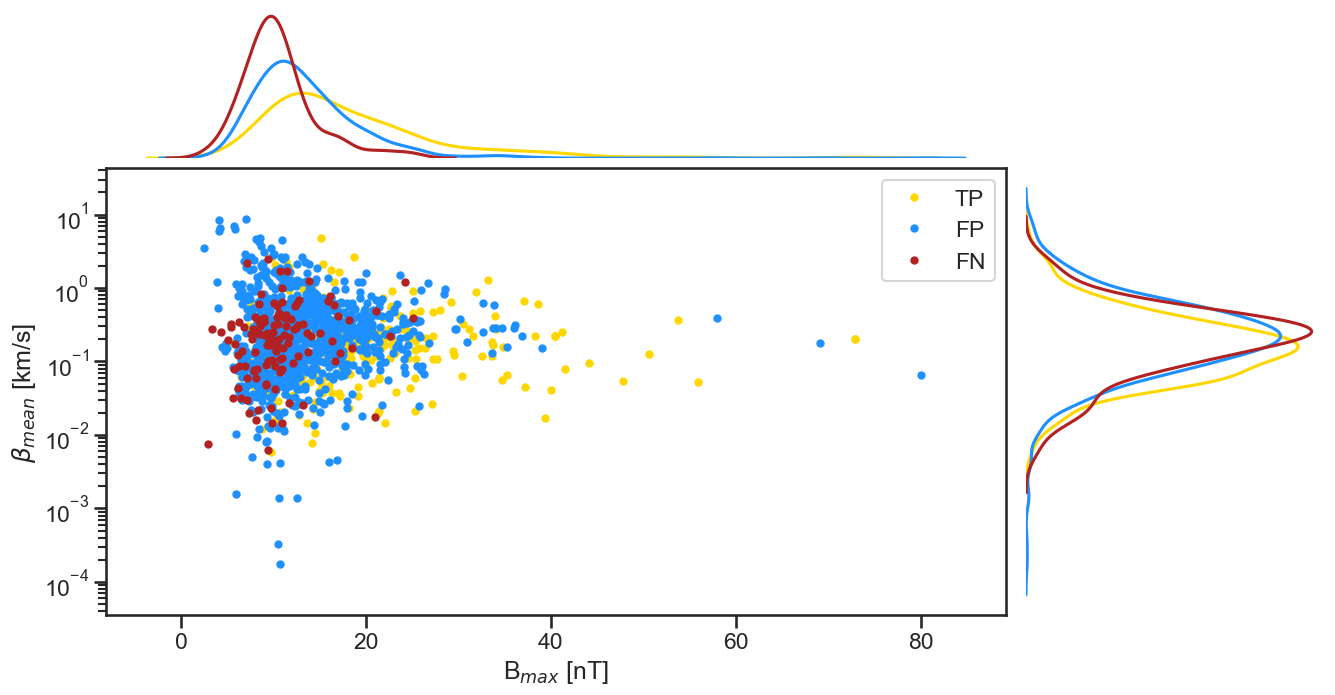

In [45]:
from matplotlib.gridspec import GridSpec
markersize = 5

alpha = 1

fig = plt.figure(figsize=(16, 8))

gs = GridSpec(3, 3, height_ratios=[1, 3, 0.001], width_ratios=[3, 1, 0.001])

ax_scatter = fig.add_subplot(gs[1, 0])  # Main scatter plot


first_tp, first_fp, first_fn = True, True, True

for i, bmax in enumerate(bmaxes_wt_tp):
    label = "TP" if first_tp else ""
    ax_scatter.plot(bmax, betameans_wt_tp[i], "o", color=geo_lime, label=label, markersize = markersize)
    first_tp = False

for i, bmax in enumerate(bmaxes_wt_fp):
    label = "FP" if first_fp else ""
    ax_scatter.plot(bmax, betameans_wt_fp[i], "o", color=geo_cornflowerblue, label=label, markersize = markersize)
    first_fp = False
    
for i, bmax in enumerate(bmaxes_wt_fn):
    label = "FN" if first_fn else ""
    ax_scatter.plot(bmax, betameans_wt_fn[i], "o", color=geo_magenta, label=label, markersize = markersize)
    first_fn = False

ax_scatter.legend(loc="upper right")


ax_scatter.set_xlabel("B$_{max}$ [nT]")
ax_scatter.set_ylabel("$\\beta_{mean}$ [km/s]")
ax_scatter.tick_params(axis='both', which='both')
ax_scatter.set_yscale("log")

ax_kde = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
sns.kdeplot(bmaxes_wt_tp, ax=ax_kde, color=geo_lime, fill=False, alpha=alpha)
sns.kdeplot(bmaxes_wt_fp, ax=ax_kde, color=geo_cornflowerblue, fill=False, alpha=alpha)
sns.kdeplot(bmaxes_wt_fn, ax=ax_kde, color=geo_magenta, fill=False, alpha=alpha)

ax_kde.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-axis ticks and labels
ax_kde.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)   # Hide y-axis ticks and labels
ax_kde.set_ylabel("")
ax_kde.spines["bottom"].set_visible(False)
ax_kde.spines["top"].set_visible(False)
ax_kde.spines["right"].set_visible(False)
ax_kde.spines["left"].set_visible(False)


# Right KDE plot (sharing y-axis with scatter plot)
ax_kde2 = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

sns.kdeplot(betameans_wt_tp, ax=ax_kde2, color=geo_lime, fill=False, alpha=alpha, vertical=True)
sns.kdeplot(betameans_wt_fp, ax=ax_kde2, color=geo_cornflowerblue, fill=False, alpha=alpha, vertical=True)
sns.kdeplot(betameans_wt_fn, ax=ax_kde2, color=geo_magenta, fill=False, alpha=alpha, vertical=True)

ax_kde2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labelleft= False)  # Hide x-axis ticks and labels
ax_kde2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelbottom = False)   # Hide y-axis ticks and labels
ax_kde2.set_xlabel("")
ax_kde2.spines["left"].set_visible(False)
ax_kde2.spines["top"].set_visible(False)
ax_kde2.spines["right"].set_visible(False)
ax_kde2.spines["bottom"].set_visible(False)

# Adjust layout to minimize overlap and reduce spacing
fig.subplots_adjust(hspace=0.05, wspace=0.05)


# Save figures
fig.savefig("../../plots/bmax_betamean_kde_revised.pdf", bbox_inches="tight")

/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/839662443.py:49: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vmaxes_wt_tp, ax=ax_kde2, color=geo_lime, fill=False, alpha=alpha, vertical=True)
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/839662443.py:50: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vmaxes_wt_fp, ax=ax_kde2, color=geo_cornflowerblue, fill=False, alpha=alpha, vertical=True)
/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/839662443.py:51: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vmaxes_wt_fn, ax=ax_kde2, color=geo_magenta, fill=False, alpha=alpha, vertical=True)


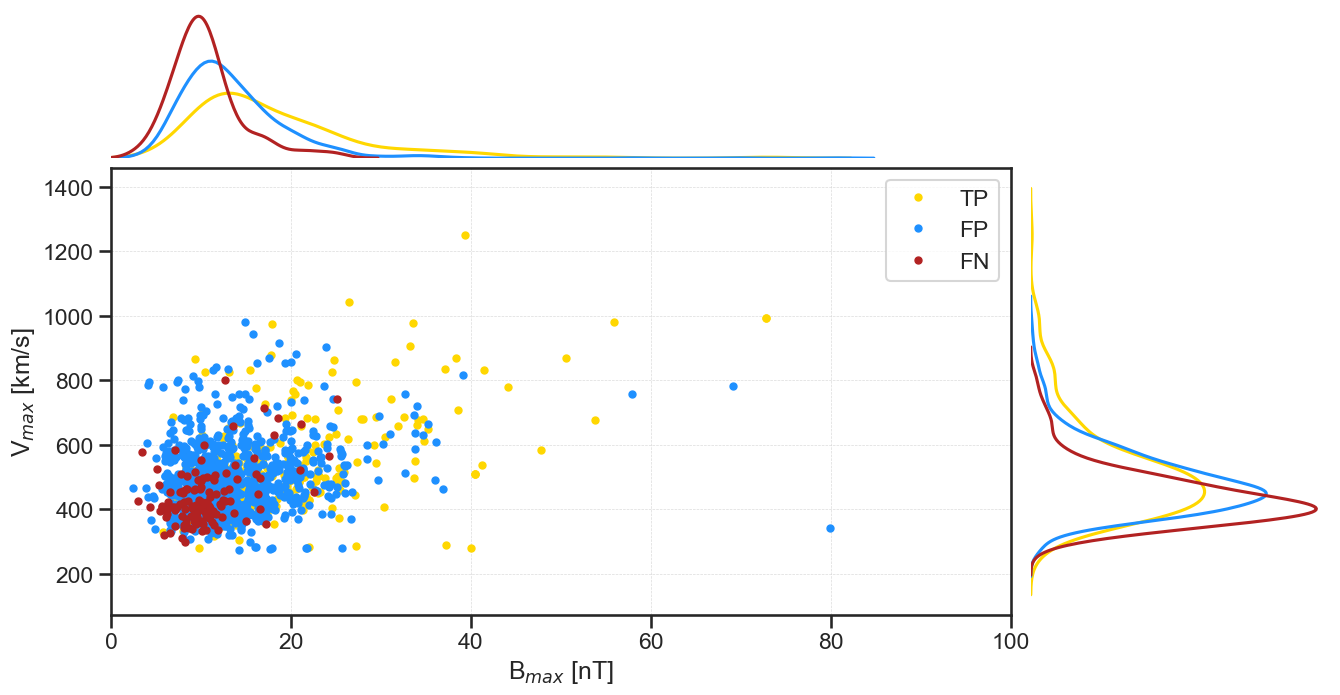

In [46]:
alpha = 1

fig = plt.figure(figsize=(16, 8))

gs = GridSpec(3, 3, height_ratios=[1, 3, 0.001], width_ratios=[3, 1, 0.001])

ax_scatter = fig.add_subplot(gs[1, 0])

first_tp, first_fp, first_fn = True, True, True

for i, bmax in enumerate(bmaxes_wt_tp):
    label = "TP" if first_tp else ""
    ax_scatter.plot(bmax, vmaxes_wt_tp[i], "o", color=geo_lime, label=label, markersize = markersize)
    first_tp = False

for i, bmax in enumerate(bmaxes_wt_fp):
    label = "FP" if first_fp else ""
    ax_scatter.plot(bmax, vmaxes_wt_fp[i], "o", color=geo_cornflowerblue, label=label, markersize = markersize)
    first_fp = False

for i, bmax in enumerate(bmaxes_wt_fn):
    label = "FN" if first_fn else ""
    ax_scatter.plot(bmax, vmaxes_wt_fn[i], "o", color=geo_magenta, label=label, markersize = markersize)
    first_fn = False

ax_scatter.legend(loc="upper right")


ax_scatter.set_xlabel("B$_{max}$ [nT]")
ax_scatter.set_ylabel("V$_{max}$ [km/s]")
ax_scatter.tick_params(axis='both', which='both')

ax_kde = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
sns.kdeplot(bmaxes_wt_tp, ax=ax_kde, color=geo_lime, fill=False, alpha=alpha)
sns.kdeplot(bmaxes_wt_fp, ax=ax_kde, color=geo_cornflowerblue, fill=False, alpha=alpha)
sns.kdeplot(bmaxes_wt_fn, ax=ax_kde, color=geo_magenta, fill=False, alpha=alpha)

ax_kde.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-axis ticks and labels
ax_kde.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)   # Hide y-axis ticks and labels
ax_kde.set_ylabel("")
ax_kde.spines["bottom"].set_visible(False)
ax_kde.spines["top"].set_visible(False)
ax_kde.spines["right"].set_visible(False)
ax_kde.spines["left"].set_visible(False)

# Right KDE plot (sharing y-axis with scatter plot)
ax_kde2 = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

sns.kdeplot(vmaxes_wt_tp, ax=ax_kde2, color=geo_lime, fill=False, alpha=alpha, vertical=True)
sns.kdeplot(vmaxes_wt_fp, ax=ax_kde2, color=geo_cornflowerblue, fill=False, alpha=alpha, vertical=True)
sns.kdeplot(vmaxes_wt_fn, ax=ax_kde2, color=geo_magenta, fill=False, alpha=alpha, vertical=True)

ax_kde2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labelleft= False)  # Hide x-axis ticks and labels
ax_kde2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelbottom = False)   # Hide y-axis ticks and labels
ax_kde2.set_xlabel("")
ax_kde2.spines["left"].set_visible(False)
ax_kde2.spines["top"].set_visible(False)
ax_kde2.spines["right"].set_visible(False)
ax_kde2.spines["bottom"].set_visible(False)
ax_scatter.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax_scatter.set_xlim(0,100)

# Adjust layout to minimize overlap and reduce spacing
fig.subplots_adjust(hspace=0.05, wspace=0.05)


# Save figures
fig.savefig("../../plots/bmax_vmax_kde_revised.pdf", bbox_inches="tight")

In [47]:
print(f"Number of detected events: {len(detected_wt)}")

plot_all = False

if plot_all:
    for event_nr, event in enumerate(detected_wt):

        delta = 24

        data = event.get_data(df_shifted_and_merged_processed, delta=delta)

        bt_keys = [col for col in data.columns if "bt" in col]
        bx_keys = [col for col in data.columns if "bx" in col]
        by_keys = [col for col in data.columns if "by" in col]
        bz_keys = [col for col in data.columns if "bz" in col]


        fig, axes = plt.subplots(1,1,figsize=(12,4), sharex=True)
        axes.plot(data.index, data[bt_keys[0]], label = "|B|", color = "black")
        axes.plot(data.index, data[bx_keys[0]], label = "B$_x$", color = geo_magenta)
        axes.plot(data.index, data[by_keys[0]], label = "B$_y$", color = geo_lime)
        axes.plot(data.index, data[bz_keys[0]], label = "B$_z$", color = geo_cornflowerblue)


        line_count = 0  # Counter for vertical lines
        for true_event in extracted_catalog:
            if true_event.begin > event.begin - datetime.timedelta(hours=delta*3) and true_event.end < event.end + datetime.timedelta(hours=delta*3):
                color = "black" if line_count < 2 else "red"
                axes.axvline(true_event.begin, color=color, linestyle="--")
                line_count += 1
                color = "black" if line_count < 2 else "red"
                axes.axvline(true_event.end, color=color, linestyle="--")
                line_count += 1

        for pred_event in cat_wt.event_cat:
            if pred_event.begin > event.begin - datetime.timedelta(hours=delta*3) and pred_event.end < event.end + datetime.timedelta(hours=delta):
                axes.axvspan(pred_event.begin, pred_event.end, color="grey", alpha=0.2, zorder=0)

        axes.axvspan(TPs_wt[event_nr].begin, TPs_wt[event_nr].end, color=geo_lime, alpha=0.3, zorder=0)

        axes.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m-%d"))
        axes.xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))

        axes.set_title(f"Detected Event {event_nr}: {event.begin} to {event.end}")

        # set the yaxis label
        axes.set_ylabel("Magnetic Field [nT]")

        plt.tight_layout()
        plt.legend()
        plt.show()
        #plt.savefig(f"../../plots/events/event{event_nr}.pdf")
        plt.close()


Number of detected events: 301


In [48]:
dates_to_plot = [
    datetime.datetime(2005, 5, 15),
    datetime.datetime(2012, 7, 15),
    datetime.datetime(2005, 1, 22),
    datetime.datetime(2022, 2, 10),
]

events_to_plot = []

for date in dates_to_plot:
    for evt in extracted_catalog: #detected_wt:
        if abs(evt.begin - date) < datetime.timedelta(days=1):
            events_to_plot.append(evt)

            print(f"Event found for date {date}: {evt.begin} to {evt.end}")

Event found for date 2005-05-15 00:00:00: 2005-05-15 02:10:00 to 2005-05-16 23:00:00
Event found for date 2012-07-15 00:00:00: 2012-07-14 17:40:00 to 2012-07-17 03:30:00
Event found for date 2005-01-22 00:00:00: 2005-01-21 17:00:00 to 2005-01-22 19:20:00
Event found for date 2022-02-10 00:00:00: 2022-02-09 20:00:00 to 2022-02-11 06:00:00


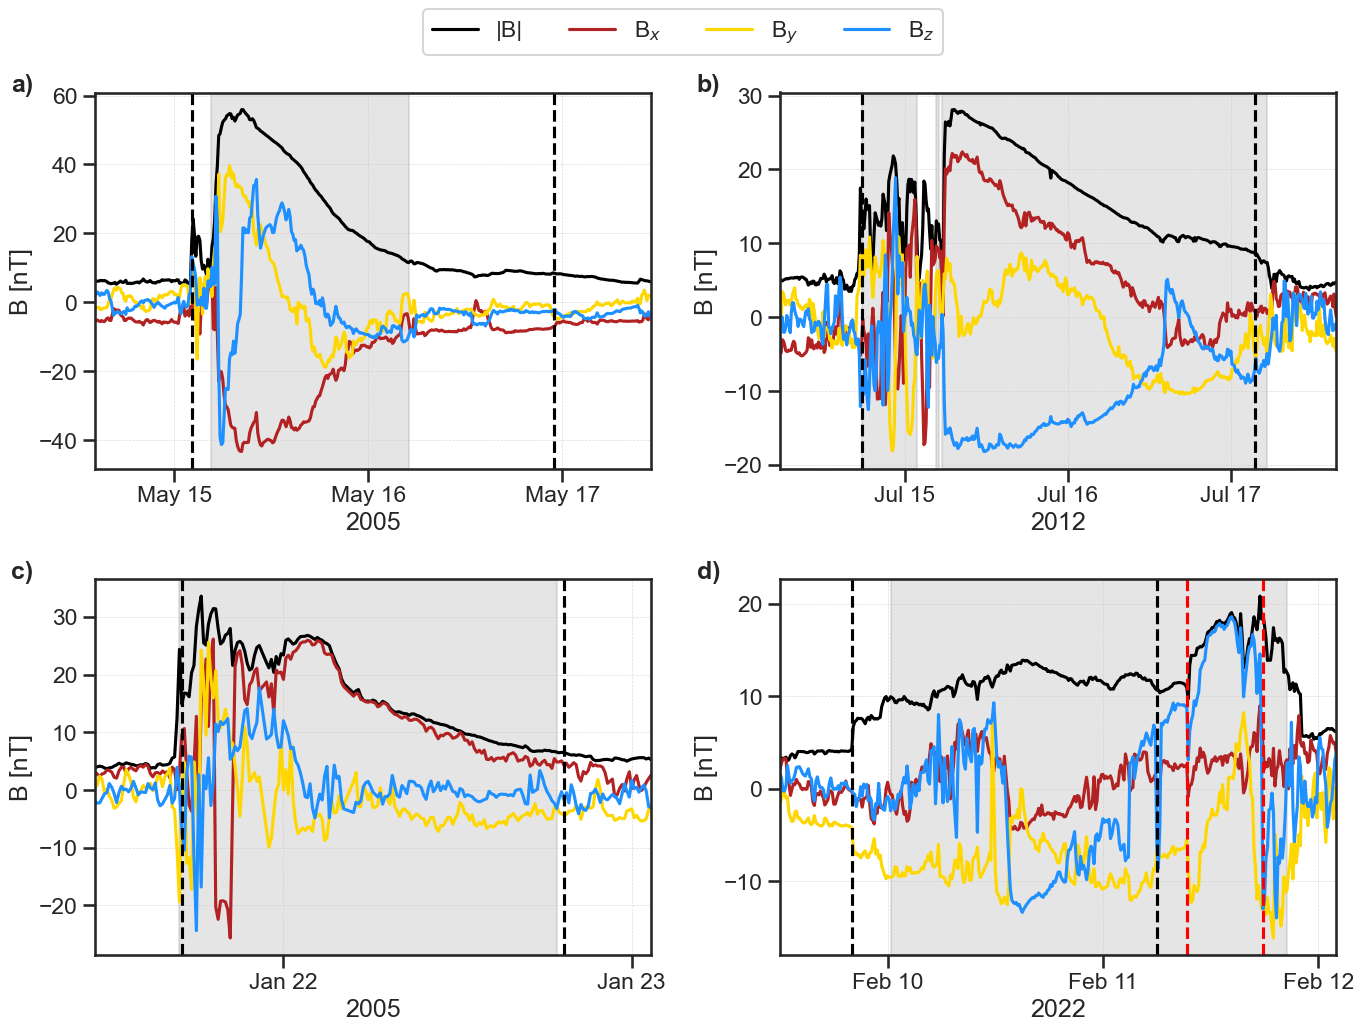

In [49]:
import matplotlib.dates as mdates

deltas = [12, 12, 6, 8]

delta2s = [12, 12, 6, 20]

labels = ["a)", "b)", "c)", "d)"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten() 

for i, (event, delta) in enumerate(zip(events_to_plot, deltas)):
    data = event.get_data(df_shifted_and_merged_processed, delta=delta, delta2=delta2s[i])

    bt_keys = [col for col in data.columns if "bt" in col]
    bx_keys = [col for col in data.columns if "bx" in col]
    by_keys = [col for col in data.columns if "by" in col]
    bz_keys = [col for col in data.columns if "bz" in col]

    ax = axes[i]
    ax.plot(data.index, data[bt_keys[0]], label="|B|", color="black")
    ax.plot(data.index, data[bx_keys[0]], label="B$_x$", color=geo_magenta)
    ax.plot(data.index, data[by_keys[0]], label="B$_y$", color=geo_lime)
    ax.plot(data.index, data[bz_keys[0]], label="B$_z$", color=geo_cornflowerblue)

    # Set x-axis limits to the data range to eliminate extra whitespace
    ax.set_xlim(data.index.min(), data.index.max())

    ax.text(-0.15, 1.05, labels[i], transform=ax.transAxes,
                     fontweight='bold', va='top', ha='left')
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

    line_count = 0  # Counter for vertical lines
    for true_event in extracted_catalog:
        if true_event.begin > event.begin - datetime.timedelta(hours=delta*3) and true_event.end < event.end + datetime.timedelta(hours=delta*3):
            color = "black" if line_count < 2 else "red"
            ax.axvline(true_event.begin, color=color, linestyle="--")
            line_count += 1
            color = "black" if line_count < 2 else "red"
            ax.axvline(true_event.end, color=color, linestyle="--")
            line_count += 1

    for pred_event in cat_wt.event_cat:
        if pred_event.begin > event.begin - datetime.timedelta(hours=delta*3) and pred_event.end < event.end + datetime.timedelta(hours=delta2s[i]*3):
            ax.axvspan(pred_event.begin, pred_event.end, color="grey", alpha=0.2, zorder=0)

    ax.set_ylabel("B [nT]")

    dates_year = data.index.min().year

    ax.set_xlabel(str(dates_year))
    
    locator = mdates.DayLocator(interval=1)
    ax.xaxis.set_major_locator(locator)
    
    # Set x-axis formatter to 'Nov 08' style
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

# Add a global legend for the entire figure
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines[:4], labels[:4], loc='upper center', ncol=4, frameon=True, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()

plt.savefig("../../plots/examples_only_B_revised.pdf", bbox_inches="tight")

/var/folders/xy/v4wq5m110gn32553dwbc7d7c0000gn/T/ipykernel_22887/2306339847.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


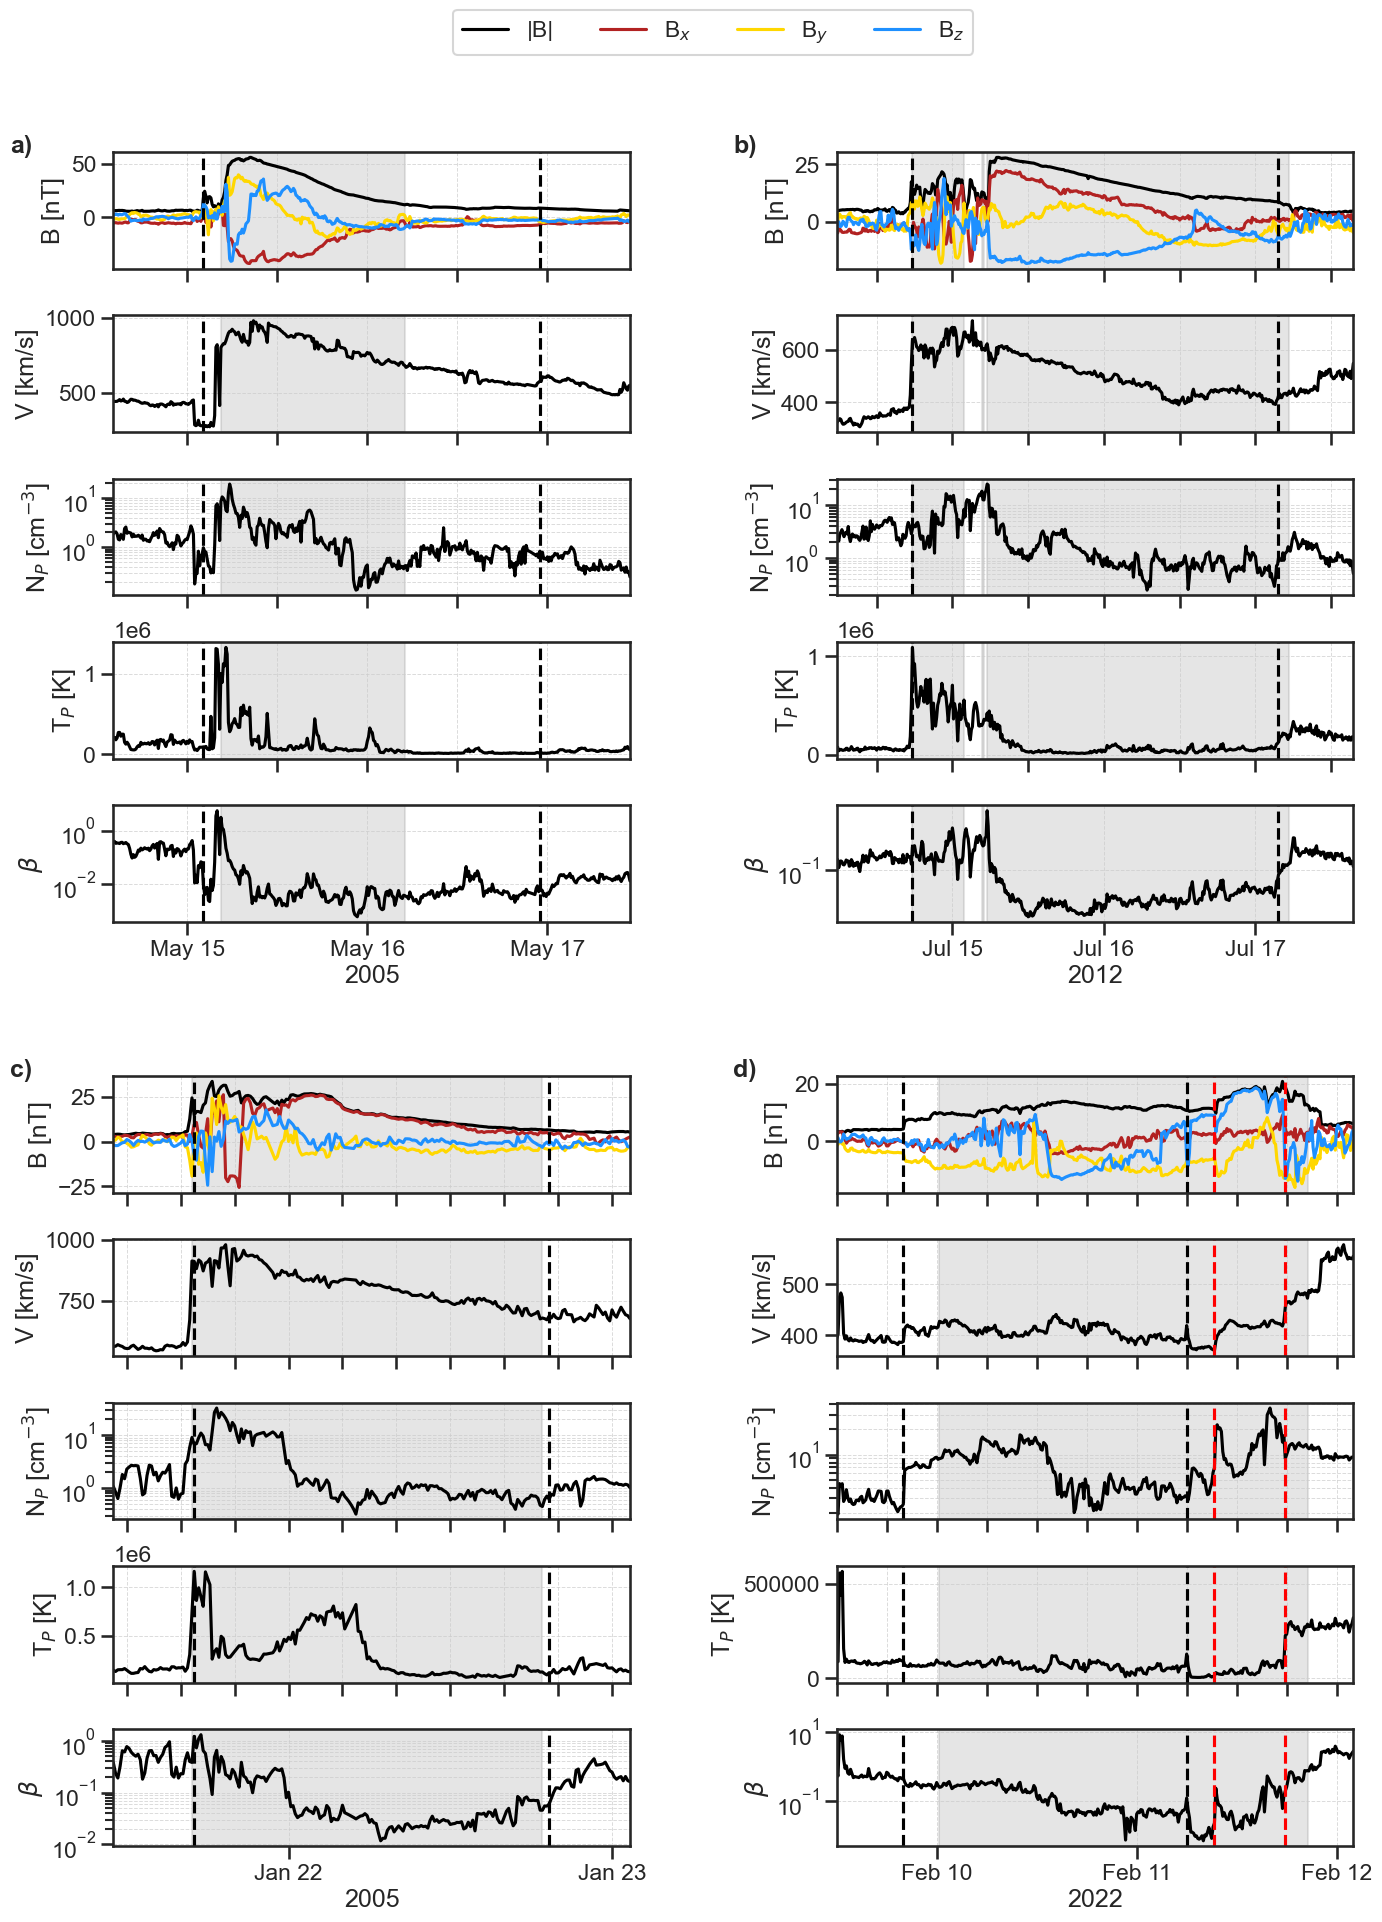

In [50]:
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker

labels = ["a)", "b)", "c)", "d)"]

fig = plt.figure(figsize=(16, 22))

# create outer grid
outer_grid = gridspec.GridSpec(2,2, wspace=0.4, hspace=0.2)

for i, (event, delta) in enumerate(zip(events_to_plot, deltas)):

    # create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer_grid[i], wspace=0.2, hspace=0.4)

    data = event.get_data(df_shifted_and_merged_processed, delta=delta, delta2=delta2s[i])

    bt_keys = [col for col in data.columns if "bt" in col]
    bx_keys = [col for col in data.columns if "bx" in col]
    by_keys = [col for col in data.columns if "by" in col]
    bz_keys = [col for col in data.columns if "bz" in col]

    v_keys = [col for col in data.columns if "vt" in col]
    n_keys = [col for col in data.columns if "np" in col]
    t_keys = [col for col in data.columns if "tp" in col]
    beta_keys = [col for col in data.columns if "beta" in col]

    # Subplots for this event
    axB, axV, axN, axT, axBeta = [fig.add_subplot(inner_grid[j, 0]) for j in range(5)]

    # --- Magnetic Field ---
    axB.plot(data.index, data[bt_keys[0]], label="|B|", color="black")
    axB.plot(data.index, data[bx_keys[0]], label="B$_x$", color=geo_magenta)
    axB.plot(data.index, data[by_keys[0]], label="B$_y$", color=geo_lime)
    axB.plot(data.index, data[bz_keys[0]], label="B$_z$", color=geo_cornflowerblue)
    axB.set_ylabel("B [nT]")

    # --- Velocity ---
    axV.plot(data.index, data[v_keys[0]], label="V", color="black")
    axV.set_ylabel("V [km/s]")

    # --- Density ---
    axN.plot(data.index, data[n_keys[0]], label="N", color="black")
    axN.set_yscale("log")
    axN.set_ylabel("N$_P$ [cm$^{-3}$]")

    # --- Temperature ---
    axT.plot(data.index, data[t_keys[0]], label="T", color="black")
    axT.set_ylabel("T$_P$ [K]")
    axT.yaxis.set_minor_locator(mticker.NullLocator())

    # --- Beta ---
    axBeta.plot(data.index, data[beta_keys[0]], label="$\\beta$", color="black")
    axBeta.set_yscale("log")
    axBeta.set_ylabel(r"$\beta$")
    axBeta.set_xlabel(str(data.index.min().year))

    # --- Formatting (all 5) ---
    for ax in [axB, axV, axN, axT, axBeta]:
        ax.set_xlim(data.index.min(), data.index.max())
        ax.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)
        ax.label_outer()

    # --- Event Boundaries (all 5) ---
    line_count = 0  # Counter for vertical lines
    for true_event in extracted_catalog:
        if true_event.begin > event.begin - datetime.timedelta(hours=delta*3) and true_event.end < event.end + datetime.timedelta(hours=delta*3):
            color = "black" if line_count < 2 else "red"
            for ax in [axB, axV, axN, axT, axBeta]:
                ax.axvline(true_event.begin, color=color, linestyle="--")
            line_count += 1
            color = "black" if line_count < 2 else "red"
            for ax in [axB, axV, axN, axT, axBeta]:
                ax.axvline(true_event.end, color=color, linestyle="--")
            line_count += 1

    # --- Predicted Events (all 5) ---
    for pred_event in cat_wt.event_cat:
        if pred_event.begin > event.begin - datetime.timedelta(hours=delta*3) and pred_event.end < event.end + datetime.timedelta(hours=delta2s[i]*3):
            for ax in [axB, axV, axN, axT, axBeta]:
                ax.axvspan(pred_event.begin, pred_event.end, color="grey", alpha=0.2, zorder=0)

    # Add letter labels (a, b, c, d) to top subplot
    axB.text(-0.2, 1.15, labels[i], transform=axB.transAxes,
             fontweight='bold', va='top', ha='left')
    

    # Date formatting for x-axis (only on bottom subplot)
    axBeta.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    axBeta.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))


# Add a global legend for the entire figure
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines[:4], labels[:4], loc='upper center', ncol=4, frameon=True, bbox_to_anchor=(0.5, 0.95))

plt.tight_layout()
plt.savefig("../../plots/examples_only_B_revised.pdf", bbox_inches="tight")